## Import some useful libraries

In [1]:
# import number crunching libraries
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex

# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

#don't truncate results
pd.set_option('display.max_rows', None)


## Load the data


In [2]:
df = pd.read_csv('responses_complete.csv', index_col=None, parse_dates=['date'])


## Compile a list of questions and answer options

In [3]:
# a dictionary of columns that contain comma-separated multiple answer options
multiple_answer_options = {
    'schools': ['CET', 'PVC', 'CHHS', 'Homeschooled'],
    'child_drive_reason': ['No - we do not drive, or prefer not to drive', 'Our own personal preference', 'Lack of available busing where we live', 'The bus schedule does not match our schedule', 'Safety concerns with buses', 'Safety concerns with walking', 'Safety concerns with bicycling', "My child's health condition"],
    'child_no_walk_reason': ['No - they walk a lot', 'My child does not like to walk', 'We live too far to walk', "We don't have time to walk", 'Fear of dangerous driving', 'Lack of adequate sidewalks', 'Lack of adequate crosswalks at busy intersections', 'Lack of crossing guards at busy intersections', "My child's health condition", 'Visually unappealing route'],
    'child_no_bike_reason': ['No - they bicycle a lot', 'My child does not like to bicycle', 'My child is too young to bicycle', 'We live too far to bicycle', 'Our own personal preference', 'Fear of dangerous driving', 'Lack of adequate bike lanes', "My child's health condition", 'Visually unappealing route', 'Hills'],
    'no_walk_reason': ['No - I walk a lot', 'I live too far to walk', 'I do not like to walk', "I don't have time to walk", 'Fear of dangerous driving', 'Lack of adequate sidewalks', 'Lack of adequate crosswalks at intersections', 'Lack of crossing guards at intersections', "My health condition", 'My own personal preference', 'Visually unappealing'], 
    'no_bike_reason': ['No - I bicycle a lot', 'I live too far to bicycle', 'I do not like to bicycle', "I don't have time to bicycle", 'Fear of dangerous driving', 'Lack of adequate bike lanes', 'My health condition', 'My own personal preference', 'Visually unappealing'],
    'drive_reason': ['No - I do not drive, or prefer not to drive', "I don't have time to walk or bicycle", 'Safety concerns with walking', 'Safety concerns with bicycling', 'My own health condition', 'My own personal preference']
}

# remember that there was also an 'other' field where users could enter custom answers... we'll deal with that later.


In [4]:
#add the most popular complaint tags to the dictionary of questions and their answer options
multiple_answer_options['problem_tags'] = [ 'speeding', 'missing sidewalks', 'cpa', 'sidewalk condition', 'aggressive driving', 'driver awareness', 's riverside', '129', 'maple', 'cyclists breaking rules', 'cleveland', 'road surface', 'municipal place', 'missing crosswalks', 'bushes on sidewalk', 'grand', 'narrow roads', 'mt airy', 'shoprite', 'benedict', 'five corners', 'van wyck', 'dummy light', 'crossing guard', 'gottwald circle', 'n riverside', 'poor lighting', 'croton commons', 'truesdale', 'hmb trail', 'cet', 'on-street parking', 'old post n', 'olcott', 'old post s', 'morningside' ]

#add the most popular suggestion tags to the dictionary of questions and their answer options
multiple_answer_options['suggestion_tags'] = [ 'bike lanes', 'more sidewalks', 'enforce speed', 'maintain sidewalks', 'reduce speed', 'educate cyclists', 'more crosswalks', 'speed bumps', 'no bike lanes', 'maintain crosswalks', 'enforce crosswalks', 'sidewalk on mt airy s', 'reduce on-street parking', 'more traffic lights', 'better lighting', 'more stop signs', 'dedicated pedestrian walk signals', 'more signs', 'improve route 9 access', 'educate pedestrians', 'outlaw cycling', 'enforce trimming of bushes', 'speed cameras', 'parking on one side only', 'bike racks', 'traffic calming', 'speed indicator signs' ]


## Response counts to each multiple select question

## schools:

,number,percent
response,,
CET,104,40%
PVC,78,30%
CHHS,70,27%
Homeschooled,5,2%


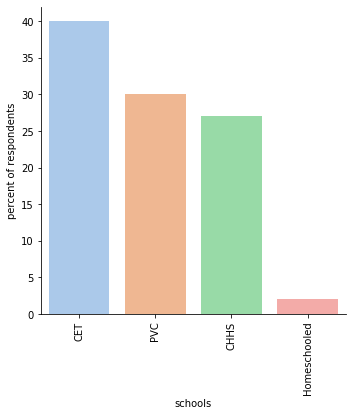

#### other responses:

Circle School                        3
St. Augustine                        2
Happy Hearts                         2
Holy Name Montessori & Asbury        1
Daycare                              1
Saint Augustine School               1
Briarcliff nursery school            1
Private school                       1
FWS                                  1
Infant Day care                      1
Manitou                              1
Currently pre-school but soon CET    1
FGL                                  1
The Harvey School                    1
Nursery. Must drive them             1
Hnmms                                1
Circle School/Asbury Play & Learn    1
Masters                              1
Windward                             1
Happy Hearts Day Care                1
Name: schools_other, dtype: int64

## child_drive_reason:

,number,percent
response,,
No - we do not drive or prefer not to drive,77,36%
Our own personal preference,45,21%
The bus schedule does not match our schedule,35,16%
Safety concerns with walking,24,11%
Safety concerns with bicycling,17,8%
Lack of available busing where we live,7,3%
Safety concerns with buses,5,2%
My child's health condition,3,1%


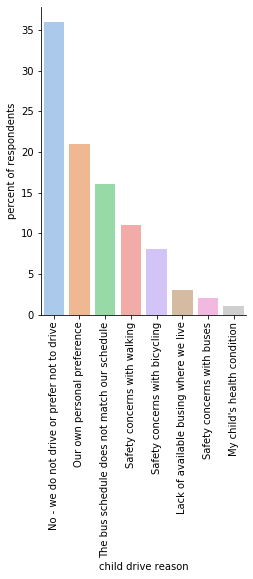

#### other responses:

Weather                                                                    2
Kids running late                                                          2
Bad weather                                                                2
Children not yet in CET. We drive them to day care on our way to work.     1
Early morning program once a week                                          1
Older chld busses                                                          1
Children too young. We’re too far.                                         1
Drive to Happy Hearts                                                      1
before care for work schedule                                              1
Only in times of bad weather as Mt. Airy is not so safe at those times.    1
Laziness                                                                   1
inclement weather or lateness                                              1
kids too young                                                             1

## child_no_walk_reason:

,number,percent
response,,
We live too far to walk,59,22%
No - they walk a lot,49,18%
We don't have time to walk,38,14%
Lack of adequate sidewalks,37,14%
Fear of dangerous driving,37,14%
Lack of adequate crosswalks at busy intersections,22,8%
My child does not like to walk,11,4%
Lack of crossing guards at busy intersections,9,3%
My child's health condition,2,1%


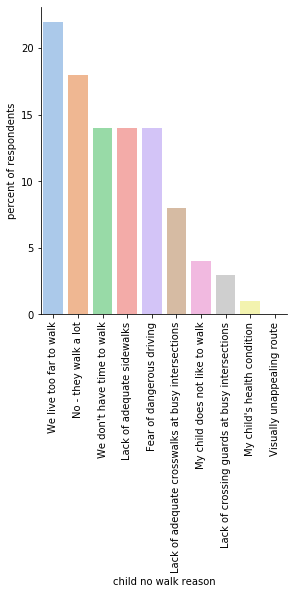

#### other responses:

Too young                                                                                          5
My child is too young to walk =D                                                                   1
Too far away. Would take over an hour.                                                             1
One cold walks and one is too young                                                                1
My child is too young. Having said that                                                            1
No side walks on South Mt Airy. No bus                                                             1
Walking to Town on Mt. Airy Road is a Death-Wish because it is too narrow and has no shoulders.    1
Does not walk.                                                                                     1
too young                                                                                          1
My daughter is the only one old enough to walk home and she does sometimes.                

## child_no_bike_reason:

,number,percent
response,,
Fear of dangerous driving,66,24%
My child is too young to bicycle,57,20%
Lack of adequate bike lanes,46,16%
Hills,29,10%
We live too far to bicycle,27,10%
My child does not like to bicycle,27,10%
Our own personal preference,21,8%
My child's health condition,3,1%
Visually unappealing route,2,1%


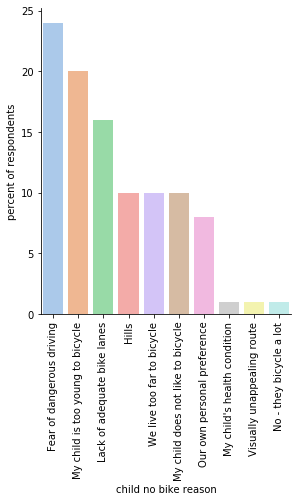

#### other responses:

Too young                                                                                                3
too young at this time.                                                                                  1
Prefer bus/walking with friends                                                                          1
Once in a while                                                                                          1
She's just not biking yet.                                                                               1
And arrive at school sweaty? This is not the 60’s or 70’s.                                               1
My child is to young to bike                                                                             1
scheduling and safety                                                                                    1
My child is too young to bicycle yet.                                                                    1
We're overly-concerned parents :)    

## no_walk_reason:

,number,percent
response,,
No - I walk a lot,210,30%
Lack of adequate sidewalks,113,16%
I don't have time to walk,87,13%
My own personal preference,65,9%
Fear of dangerous driving,56,8%
I live too far to walk,51,7%
Lack of adequate crosswalks at intersections,46,7%
My health condition,27,4%
Visually unappealing,19,3%


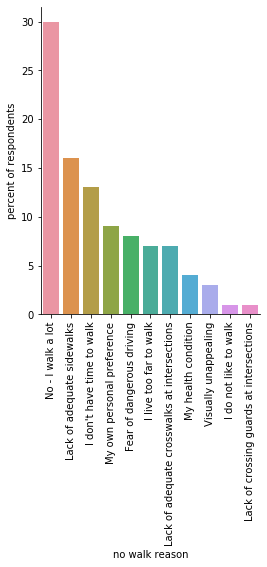

#### other responses:

Hills                                                                                                                           3
I prefer to bike                                                                                                                1
Overgrown sidewalks                                                                                                             1
Children pickups and drop offs                                                                                                  1
coming back up mt. airy too hard                                                                                                1
I live on Dailey Drive off 129. 129 is horrible for walking/biking. Far too narrow. We need a sidewalk                          1
I belong to a Club where I regularly exercise.                                                                                  1
Looking for faster options                                                                

## no_bike_reason:

,number,percent
response,,
Fear of dangerous driving,126,21%
Lack of adequate bike lanes,124,21%
My own personal preference,90,15%
I do not like to bicycle,84,14%
I don't have time to bicycle,64,11%
No - I bicycle a lot,57,10%
My health condition,26,4%
I live too far to bicycle,20,3%
Visually unappealing,6,1%


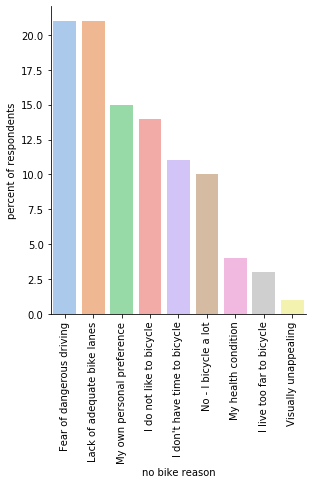

#### other responses:

Hills                                                                                                                                                              4
Fear of dangerous drivers                                                                                                                                          3
I currently don’t own a bicycle                                                                                                                                    2
Don’t know how                                                                                                                                                     2
I have ordered a shed - once arrived                                                                                                                               1
grades between Cortlandt Station and our house are too steep!                                                                                                      1
Timing I a

## drive_reason:

,number,percent
response,,
My own personal preference,171,32%
I don't have time to walk or bicycle,134,25%
Safety concerns with bicycling,95,18%
Safety concerns with walking,60,11%
No - I do not drive or prefer not to drive,39,7%
My own health condition,28,5%


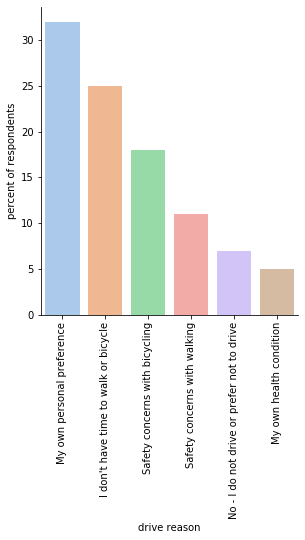

#### other responses:

Hills                                                                                    6
Time                                                                                     5
time                                                                                     3
Too far                                                                                  3
Convenience                                                                              3
Distance from my airy                                                                    2
I use the car during bad weather or when I need to carry more than I can on a bicycle    1
I only drive to get groceries                                                            1
The weather                                                                              1
must transport heavy stuff                                                               1
Tough to get back up My Airy hills on bike/foot.                                         1

## problem_tags:

,number,percent
response,,
speeding,125,9%
missing sidewalks,122,9%
cpa,87,6%
sidewalk condition,83,6%
aggressive driving,75,6%
driver awareness,74,6%
s riverside,70,5%
129,52,4%
maple,48,4%


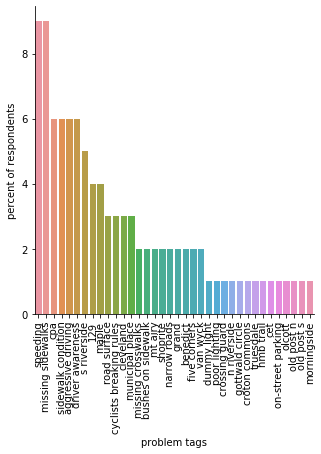

#### other responses:

crosswalk condition           6
bungalow                      6
radnor                        6
albany post road              5
upper village                 5
station lot                   4
parking on sidewalk           4
nordica                       4
side-by-side cyclists         4
library                       4
pvc                           4
pedestrians in roads          4
narrow streets                3
cyclists at croton landing    3
illegal parking               3
dpw                           3
gerstein                      3
more sidewalks                2
brook st                      2
lexington                     2
Name: problem_tags_other, dtype: int64

## suggestion_tags:

,number,percent
response,,
bike lanes,104,15%
more sidewalks,98,15%
enforce speed,66,10%
maintain sidewalks,64,9%
reduce speed,46,7%
educate cyclists,39,6%
more crosswalks,38,6%
speed bumps,24,4%
no bike lanes,17,3%


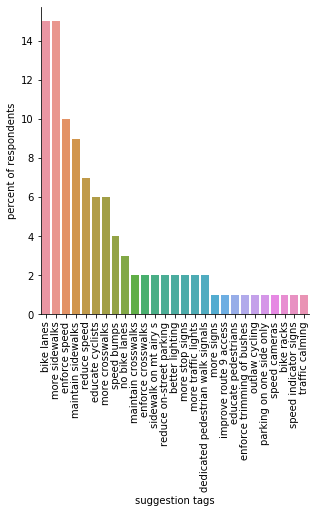

#### other responses:

lower speed limit                                      4
sharrows                                               3
no parking next to corners                             3
lower speed limits                                     3
dedicated bicycle trails                               3
clearer signs                                          3
more parking                                           2
reopen hmb river trail                                 2
reduce num cars                                        2
outlaw walking in road                                 2
make village responsible for snow removal              2
traffic light on cpa                                   2
wider roads                                            2
raise speed limits                                     2
5 way stop on mt airy s                                2
lower taxes                                            2
stop signs on benedict                                 2
require cyclists wear reflectiv

In [5]:
# loop through each question
for question in multiple_answer_options.keys():    
    display(Markdown('## {}:'.format(question)))

    # calculate both absolute numbers and percentages for each answer option
    df_abs = df.filter(regex=("^{}_.*".format(question))).sum().sort_values(ascending=False).to_frame()
    df_per = df_abs.apply(lambda x: 100 * x / x.sum()).round(0).astype(int).sort_values(by=0,ascending=False).astype(str) + '%'
    
    # merge both absolute numbers and percentages together into one DataFrame
    df_both = pd.merge(df_abs, df_per, right_index=True, left_index=True)
    
    # prettify the row indices
    df_both = df_both.reset_index()
    df_both['index'] = df_both['index'].str.replace("{}_".format(question), '')
    df_both = df_both.rename(columns={'0_x': 'number', '0_y': 'percent', 'index': 'response'})
    df_both.set_index('response', inplace=True)
    
    # show the data
    display(df_both)

    # remove percent signs next to the data
    data = df_both
    for col in data:
        # remove percent sign, if present so we can do math on it
        try:
            data[col] = data[col].str.replace('%', '').astype(float).round(0).astype(int) # get rid of percent signs
        except:
            pass

    # plot the data
    sns.set_palette("pastel") #deep, muted, pastel, bright, dark, or colorblind
    data = data['percent'].reset_index()
    data.columns = [question.replace('_', ' '), 'percent of respondents']
    g = sns.catplot(x=question.replace('_', ' '), y="percent of respondents", kind="bar", data=data);
    g.set_xticklabels(rotation=90)
    plt.show()
    
    # show a few 'other' answers
    display(Markdown('#### other responses:'))
    s_others = df['{}_other'.format(question)]
    display(s_others.value_counts()[:20])
